# Gráficos interativos com o *plotly*

## Gráficos de linha

Vamos começar criando gráficos de linha.

Primeiramente utilizaremos um pacote rápido e eficiente para a construção de gráficos interativos: o **plotly.express**

Para este tipo de plot é conveniente ter apenas um valor possível para a coordenada *y* e ter uma segunda coluna determinando a cor a ser utilizada.

Vamos então refazer nosso exemplo do Covid por regiões.

In [47]:
import plotly.express as px

Preparando o banco de dados para o **plotly.express**:

In [48]:
covid_regioes_px = covid_BR.set_index('data').query('regiao != "Brasil"')[['obitosAcumulado', 'regiao']].reset_index().rename(
    {'obitosAcumulado':'Total de Óbitos','regiao':'Região','data':'Data'},axis=1)
covid_regioes_px = covid_regioes_px.groupby(['Região','Data']).sum()/2
covid_regioes_px = covid_regioes_px.reset_index().set_index('Data')

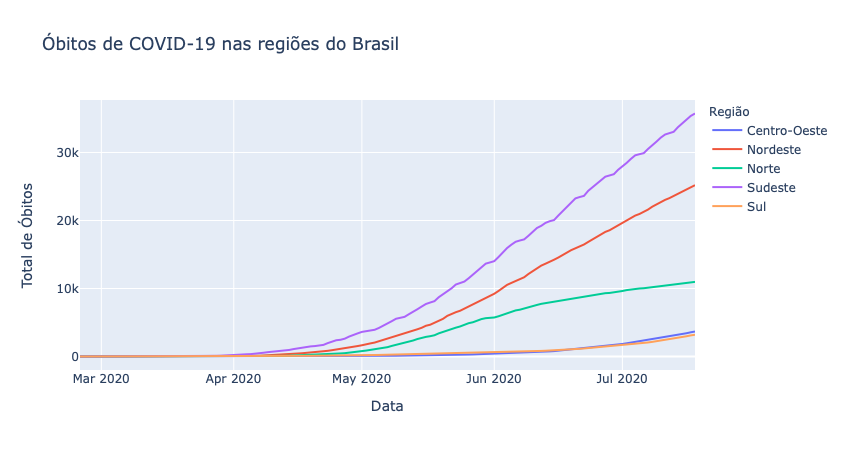

In [49]:
fig = px.line(covid_regioes_px, y="Total de Óbitos", color="Região",
              line_group="Região", hover_name="Região", title='Óbitos de COVID-19 nas regiões do Brasil')
fig.show()

Podemos fixar o mesmo valor da coordenada *x* para todas as regiões na hora de passar o *mouse*:

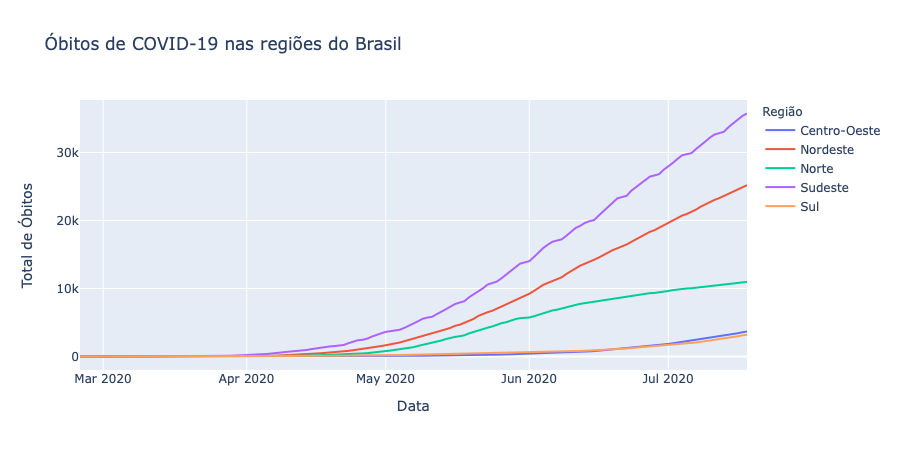

In [50]:
fig = px.line(covid_regioes_px, y="Total de Óbitos", color="Região",
              line_group="Região", hover_name="Região", title='Óbitos de COVID-19 nas regiões do Brasil')
fig.update_layout(hovermode='x unified')
fig.show()

Vamos agora construir o mesmo gráfico com o pacote **plotly.graph_objects**.

Não possui a simplicidade do **plotly.express**, porém possui mais flexibilidade e é mais "customizável".

Para exemplificar a utilidade dele, vamos utilizar no conjunto de dados *covid_regioes* que possui 5 colunas distintas como valores de *y*. 

Além disso, veremos que o gráfico com *x* unificado ficará naturalmente melhor no **plotly.graph_objects**.

Muitos argumentos disponíveis no **plotly.graph_objects** não estão disponíveis no **plotly.express**.

In [51]:
import plotly.graph_objects as go

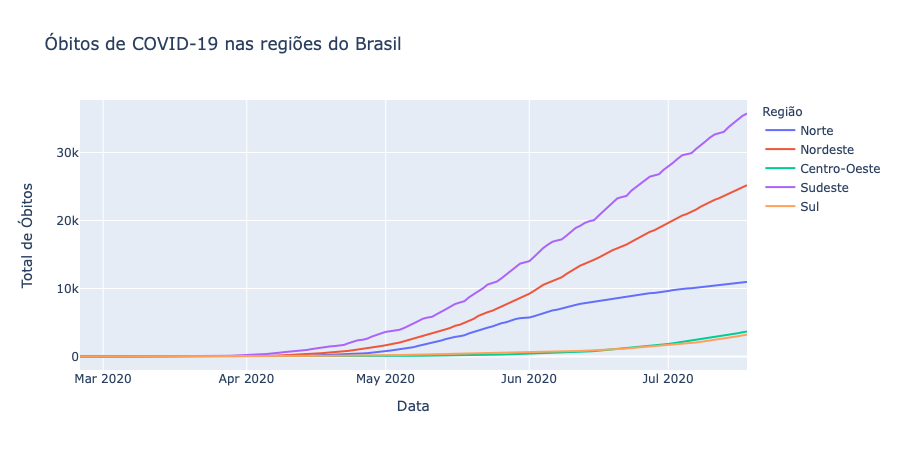

In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_regioes.index, y=covid_regioes['obitos_Norte'], mode='lines', name='Norte'))
fig.add_trace(go.Scatter(x=covid_regioes.index, y=covid_regioes['obitos_Nordeste'], mode='lines', name='Nordeste'))
fig.add_trace(go.Scatter(x=covid_regioes.index, y=covid_regioes['obitos_Centro-Oeste'], mode='lines', name='Centro-Oeste'))
fig.add_trace(go.Scatter(x=covid_regioes.index, y=covid_regioes['obitos_Sudeste'], mode='lines', name='Sudeste'))
fig.add_trace(go.Scatter(x=covid_regioes.index, y=covid_regioes['obitos_Sul'], mode='lines', name='Sul'))
fig.update_layout( title='Óbitos de COVID-19 nas regiões do Brasil',
                   xaxis_title='Data', yaxis_title='Total de Óbitos', legend_title_text='Região', hovermode='x unified')

Vamos agora reordenar para melhor apresentação:

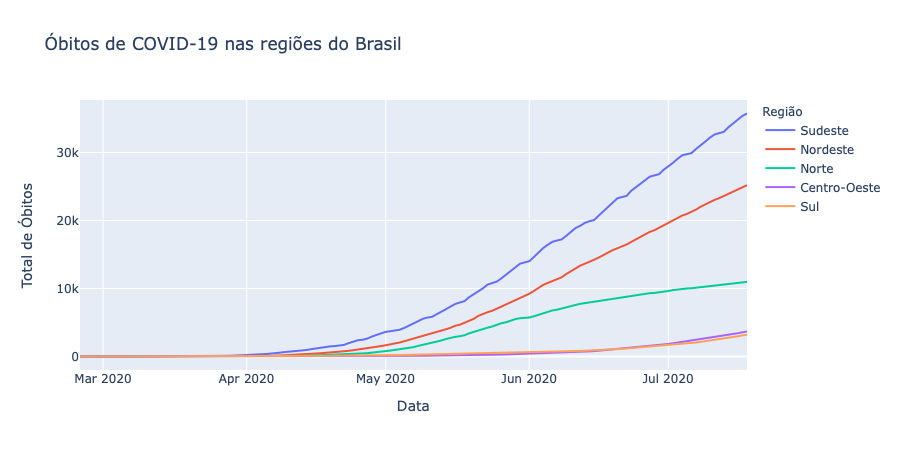

In [53]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_regioes.index, y=covid_regioes['obitos_Sudeste'], mode='lines', name='Sudeste'))
fig.add_trace(go.Scatter(x=covid_regioes.index, y=covid_regioes['obitos_Nordeste'], mode='lines', name='Nordeste'))
fig.add_trace(go.Scatter(x=covid_regioes.index, y=covid_regioes['obitos_Norte'], mode='lines', name='Norte'))
fig.add_trace(go.Scatter(x=covid_regioes.index, y=covid_regioes['obitos_Centro-Oeste'], mode='lines', name='Centro-Oeste'))
fig.add_trace(go.Scatter(x=covid_regioes.index, y=covid_regioes['obitos_Sul'], mode='lines', name='Sul'))
fig.update_layout( title='Óbitos de COVID-19 nas regiões do Brasil', 
                  xaxis_title='Data', yaxis_title='Total de Óbitos', legend_title_text='Região', hovermode='x unified')

## Gráficos de coluna

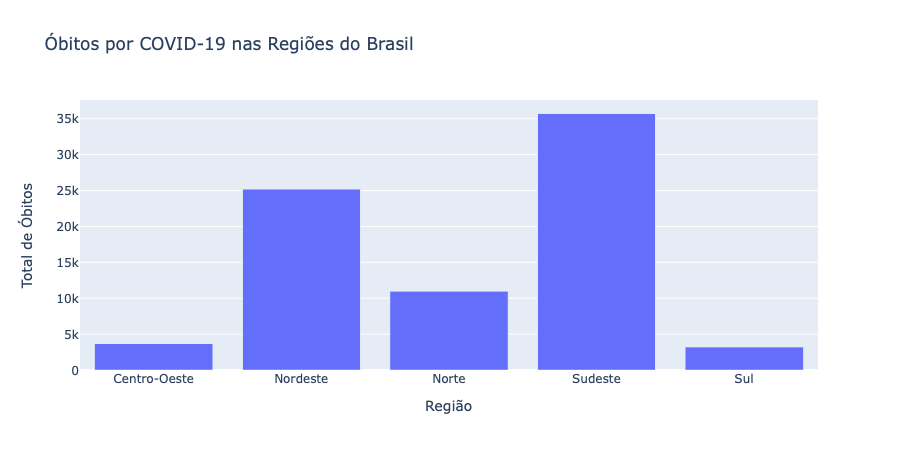

In [54]:
fig = px.bar(covid_Regioes.reset_index().rename({'regiao':'Região','obitosNovos':'Total de Óbitos'}, axis=1), 
                                                x='Região', y='Total de Óbitos', 
                                                title='Óbitos por COVID-19 nas Regiões do Brasil')
fig.show()

Neste caso é bem simples fazer este gráfico com **graph_objects**:

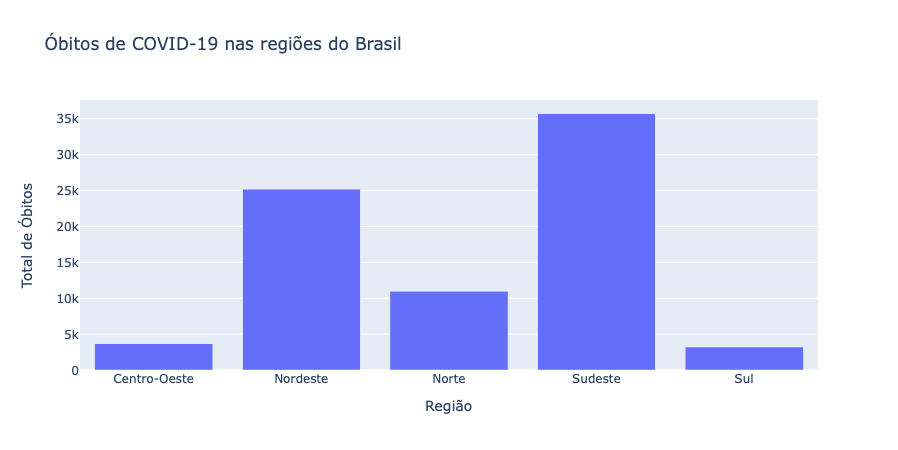

In [55]:
covid_coluna = covid_Regioes.reset_index().rename({'regiao':'Região','obitosNovos':'Total de Óbitos'}, axis=1)

fig = go.Figure([go.Bar(x=covid_coluna['Região'], y=covid_coluna['Total de Óbitos'])])
fig.update_layout( title='Óbitos de COVID-19 nas regiões do Brasil', 
                  xaxis_title='Região', yaxis_title='Total de Óbitos')
fig.show()

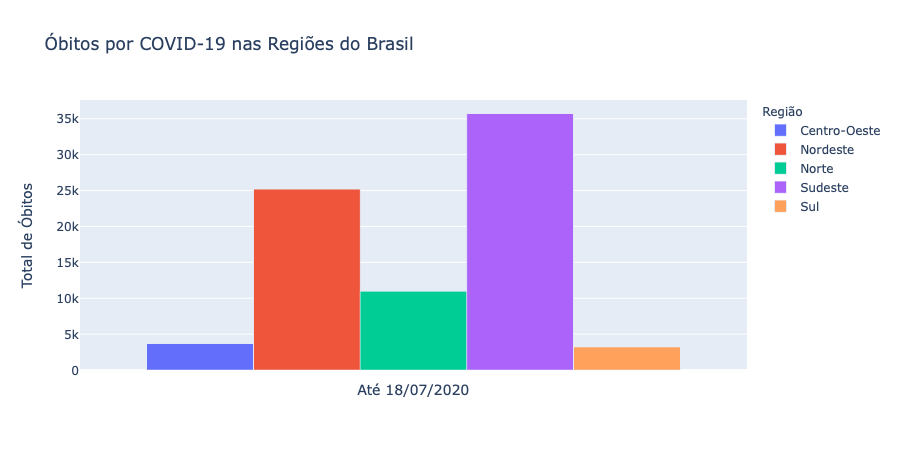

In [56]:
covid_coluna = covid_Regioes.reset_index().rename({'regiao':'Região','obitosNovos':'Total de Óbitos'}, axis=1)
covid_coluna['Até 18/07/2020'] = '' #Criamos uma coluna igual para todos para servir de coordenada x
fig = px.bar(covid_coluna, 
                                                x='Até 18/07/2020', y='Total de Óbitos', color='Região',
                                                title='Óbitos por COVID-19 nas Regiões do Brasil',
             barmode='group') #Esse argumento coloca as colunas lado a lado
fig.show()

Vamos recriar o gráfico anterior com **graph_objects**, neste caso sem colocar nenhuma informação no eixo *x*.

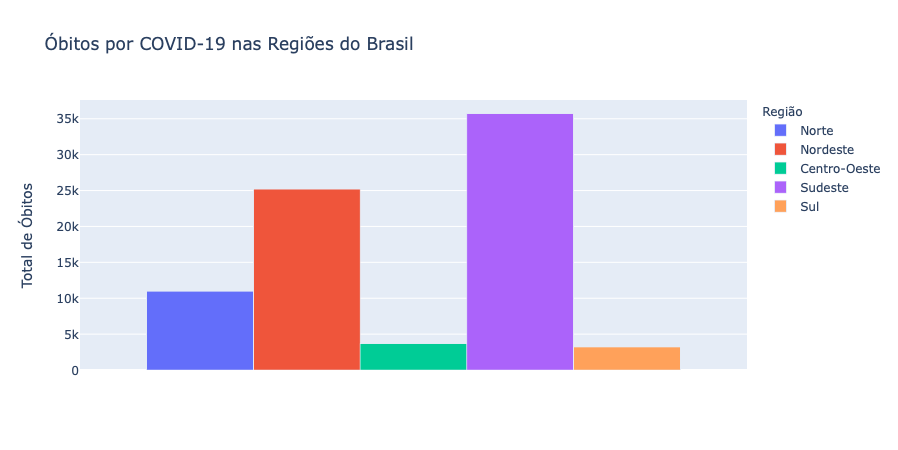

In [57]:
fig = go.Figure(data=[
    go.Bar(name='Norte', x=['Óbitos'], y=covid_Regioes.loc['Norte']),
    go.Bar(name='Nordeste', x=['Óbitos'], y=covid_Regioes.loc['Nordeste']),
    go.Bar(name='Centro-Oeste', x=['Óbitos'], y=covid_Regioes.loc['Centro-Oeste']),
    go.Bar(name='Sudeste', x=['Óbitos'], y=covid_Regioes.loc['Sudeste']),
    go.Bar(name='Sul', x=['Óbitos'], y=covid_Regioes.loc['Sul'])
])
fig.update_layout(barmode='group', title='Óbitos por COVID-19 nas Regiões do Brasil', 
                  yaxis_title='Total de Óbitos', legend_title_text='Região')
fig.update_xaxes(showticklabels=False)
fig.show()

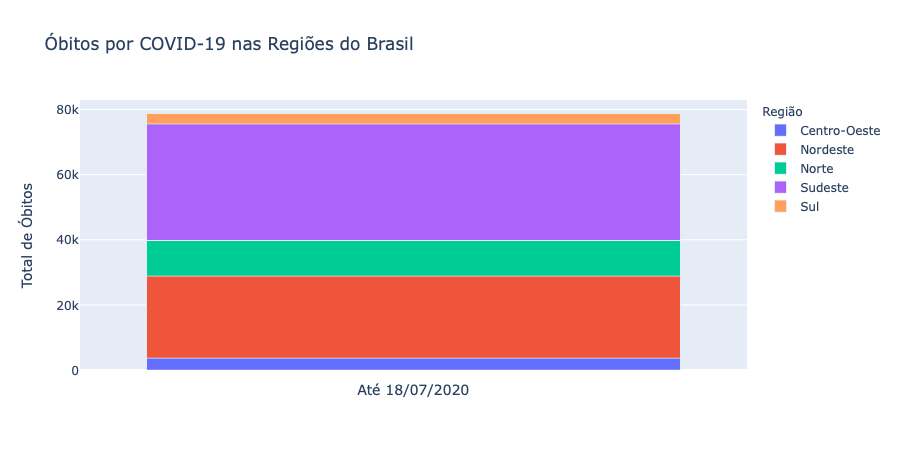

In [58]:
fig = px.bar(covid_coluna, x='Até 18/07/2020', y='Total de Óbitos', color='Região',
                                                title='Óbitos por COVID-19 nas Regiões do Brasil')
#Sem o argumento barmode='group' ficamos com as colunas empilhadas
fig.show()

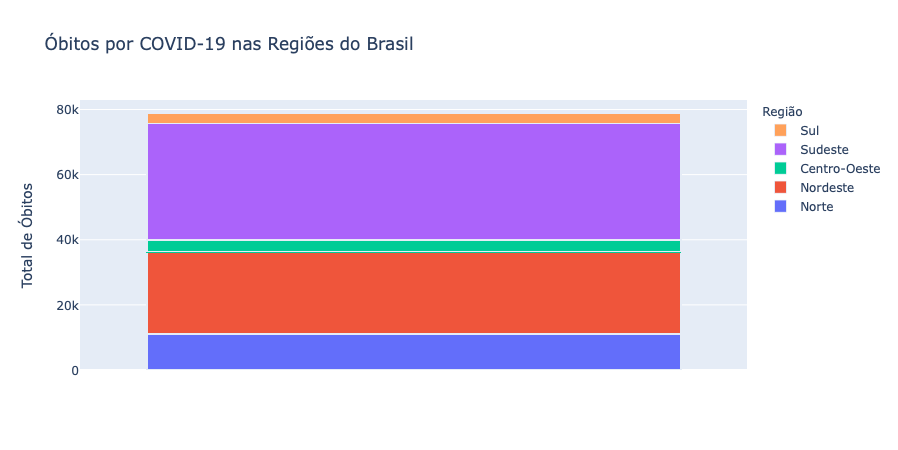

In [59]:
fig = go.Figure(data=[
    go.Bar(name='Norte', x=['Óbitos'], y=covid_Regioes.loc['Norte']),
    go.Bar(name='Nordeste', x=['Óbitos'], y=covid_Regioes.loc['Nordeste']),
    go.Bar(name='Centro-Oeste', x=['Óbitos'], y=covid_Regioes.loc['Centro-Oeste']),
    go.Bar(name='Sudeste', x=['Óbitos'], y=covid_Regioes.loc['Sudeste']),
    go.Bar(name='Sul', x=['Óbitos'], y=covid_Regioes.loc['Sul'])
])
fig.update_layout(barmode='stack', title='Óbitos por COVID-19 nas Regiões do Brasil', 
                  yaxis_title='Total de Óbitos', legend_title_text='Região')
fig.update_xaxes(showticklabels=False)
fig.show()

## Gráfico de Setores

O método *pie* das bibliotecas **plotly.express** e **plotly.graph_objects** são bastante imediatos e se assemelham muito ao que vimos anteriormente para o **matplotlib**.

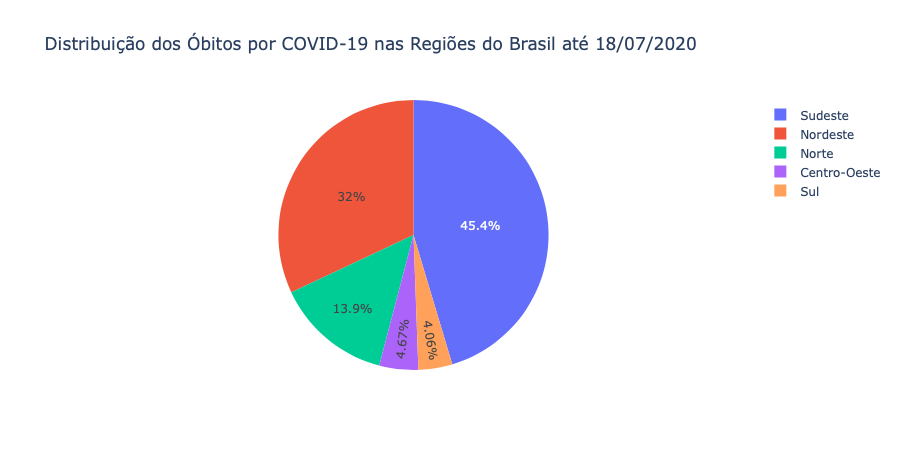

In [60]:
fig = px.pie(covid_Regioes_pct, values='obitosNovos', names=covid_Regioes_pct.index, 
             title = 'Distribuição dos Óbitos por COVID-19 nas Regiões do Brasil até 18/07/2020')
fig.show()

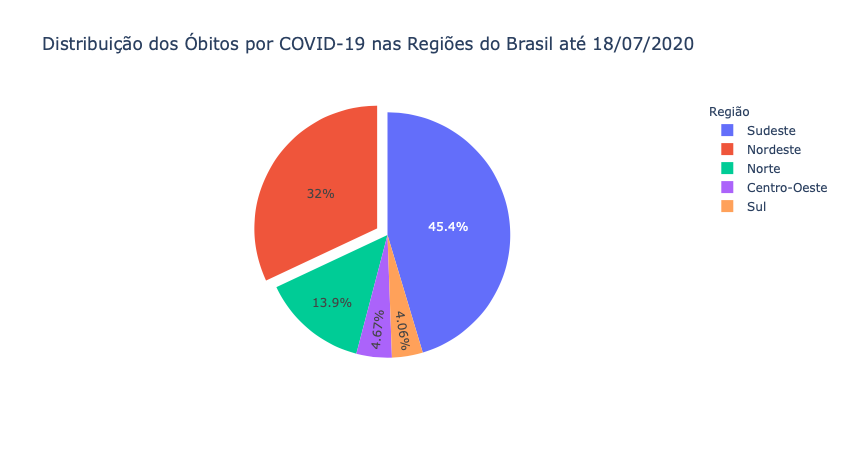

In [61]:
fig = go.Figure(data=[go.Pie(labels=covid_Regioes_pct.index, values=covid_Regioes_pct.obitosNovos, 
                             pull=covid_Regioes_pct.explodir)])
fig.update_layout(title='Distribuição dos Óbitos por COVID-19 nas Regiões do Brasil até 18/07/2020', 
                  yaxis_title='Total de Óbitos', legend_title_text='Região')
fig.show()

## Gráfico de Dispersão

Na prática os gráficos de linha e de dispersão são realizados com o mesmo método no **plotly.graph_objects**. Já no **plotly.express** é análogo ao método que vimos para o **matplotlib**. 

In [62]:
df_exemplo_px = pd.DataFrame(df_exemplo['coluna_1']).rename({'coluna_1':'Valor'}, axis=1)
df_exemplo_px['Coluna'] = 'Coluna 1' 
df_exemplo_px_temp = pd.DataFrame(df_exemplo['coluna_2']).rename({'coluna_2':'Valor'}, axis=1)
df_exemplo_px_temp['Coluna'] = 'Coluna 2'
df_exemplo_px = pd.concat([df_exemplo_px, df_exemplo_px_temp])
df_exemplo_px_temp = pd.DataFrame(df_exemplo['coluna_3']).rename({'coluna_3':'Valor'}, axis=1)
df_exemplo_px_temp['Coluna'] = 'Coluna 3'
df_exemplo_px = pd.concat([df_exemplo_px, df_exemplo_px_temp])
df_exemplo_px.head()

Valor    Coluna
2020-01-01 -0.416092  Coluna 1
2020-01-02 -0.137970  Coluna 1
2020-01-03  0.575827  Coluna 1
2020-01-04 -0.017367  Coluna 1
2020-01-05  1.384279  Coluna 1

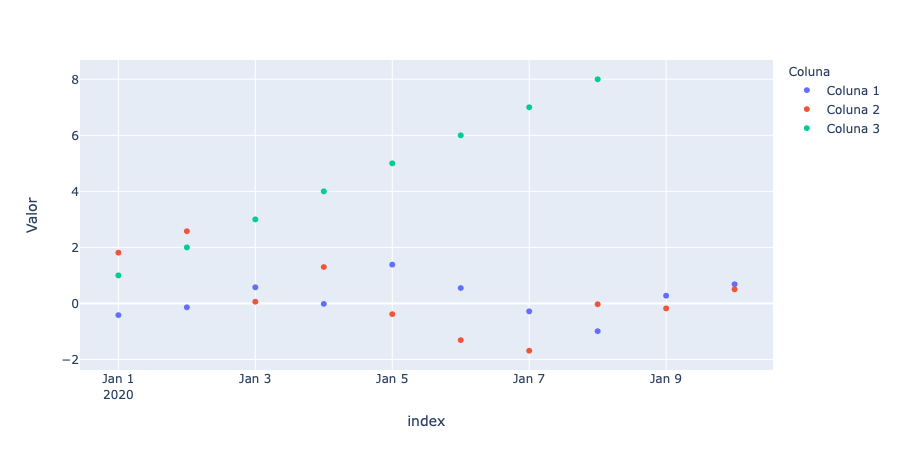

In [63]:
fig = px.scatter(df_exemplo_px, x=df_exemplo_px.index, y='Valor', color='Coluna')
fig.show()

Utilizando o pacote podemos trabalhar diretamente com o *df_exemplo*:

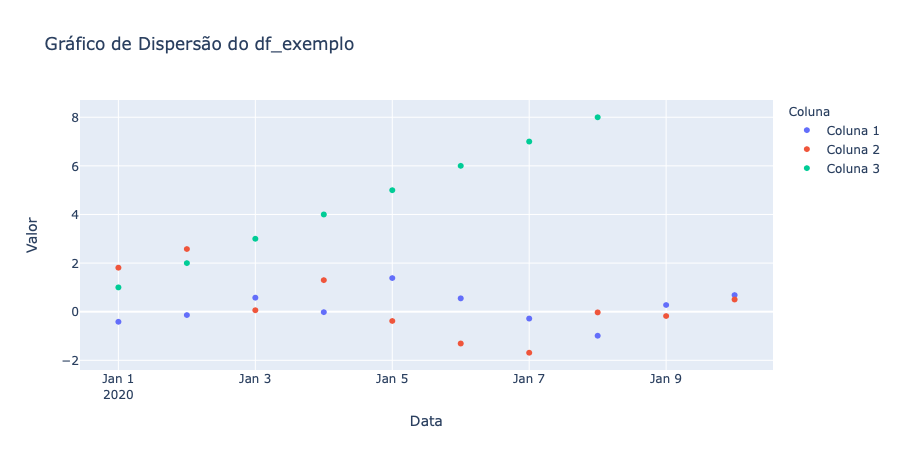

In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_exemplo.index, y=df_exemplo['coluna_1'], mode='markers', name='Coluna 1'))
fig.add_trace(go.Scatter(x=df_exemplo.index, y=df_exemplo['coluna_2'], mode='markers',name='Coluna 2'))
fig.add_trace(go.Scatter(x=df_exemplo.index, y=df_exemplo['coluna_3'], mode='markers',name='Coluna 3'))
fig.update_layout( title='Gráfico de Dispersão do df_exemplo',
                   xaxis_title='Data', yaxis_title='Valor', legend_title_text='Coluna')

## Histograma

Com o **plotly.express** podemos aplicar o método diretamente com poucas diferenças entre os argumentos. Vemos que no lugar de *bins*, devemos utilizar *nbins* e no lugar de *alpha*, devemos combinar *barmode='overlay'* com *opacity*.

Vamos preparar o banco de dados para o histograma.

In [65]:
covid_regioes_diarios = pd.DataFrame()

regioes = covid_BR.query('regiao != "Brasil"')['regiao'].drop_duplicates().array

for regiao in regioes:
    temp_series = covid_BR.set_index('data').query('regiao == @regiao')['obitosNovos'].groupby('data').sum()/2
    temp_series.name = 'obitos_' + regiao
    covid_regioes_diarios = pd.concat([covid_regioes_diarios, temp_series], axis=1)
    
covid_regioes_diarios.index = pd.to_datetime(covid_regioes_diarios.index)
covid_regioes_diarios

obitos_Norte  obitos_Nordeste  obitos_Sudeste  obitos_Sul  \
data                                                                    
2020-02-25           0.0              0.0             0.0         0.0   
2020-02-26           0.0              0.0             0.0         0.0   
2020-02-27           0.0              0.0             0.0         0.0   
2020-02-28           0.0              0.0             0.0         0.0   
2020-02-29           0.0              0.0             0.0         0.0   
...                  ...              ...             ...         ...   
2020-07-14          76.0            315.0           682.0       139.0   
2020-07-15          65.0            347.0           528.0       130.0   
2020-07-16          97.0            373.0           611.0       105.0   
2020-07-17         121.0            257.0           517.0       129.0   
2020-07-18          61.0            292.0           358.0        95.0   

            obitos_Centro-Oeste  
data                             
2020-02-25                  0.0  
2020-02-26                  0.0  
2020-02-27                  0.0  
2020-02-28                  0.0  
2020-02-29                  0.0  
...                         ...  
2020-07-14                 88.0  
2020-07-15                163.0  
2020-07-16                136.0  
2020-07-17                139.0  
2020-07-18                115.0  

[145 rows x 5 columns]

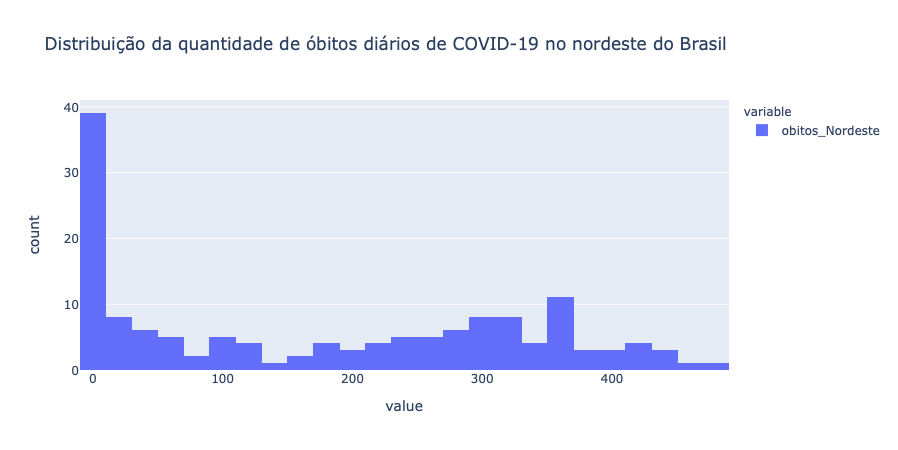

In [66]:
fig = px.histogram(covid_regioes_diarios.obitos_Nordeste, nbins=30, title='''
Distribuição da quantidade de óbitos diários de COVID-19 no nordeste do Brasil
                   ''')
fig.show()

In [67]:
covid_regioes_diarios_px = covid_BR.set_index(
    'data').query('regiao != "Brasil"')[['obitosNovos', 'regiao']].reset_index().rename(
    {'obitosNovos':'Óbitos','regiao':'Região','data':'Data'},axis=1)
covid_regioes_diarios_px = covid_regioes_diarios_px.groupby(['Região','Data']).sum()/2
covid_regioes_diarios_px = covid_regioes_diarios_px.reset_index().set_index('Data')

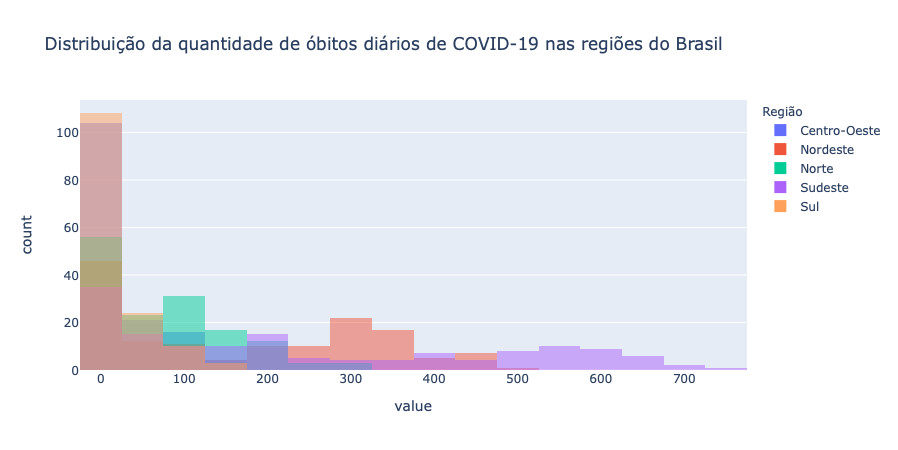

In [68]:
fig = px.histogram(covid_regioes_diarios_px, nbins=30, color='Região', opacity=0.5, barmode='overlay', title='''
Distribuição da quantidade de óbitos diários de COVID-19 nas regiões do Brasil
                   ''')
fig.show()

Agora vejamos com **plotly.graph_objects**:

In [69]:
def fazer_histograma_plotly():
    fig = go.Figure()
    fig.update_layout(barmode='overlay', title='''
Distribuição da quantidade de óbitos diários de COVID-19 nas regiões do Brasil
                   ''',
                     yaxis_title="Quantidade de Dias", xaxis_title="Óbitos",legend_title_text='Região')
    fig.add_trace(go.Histogram(x=covid_regioes_diarios['obitos_Norte'], name='Norte'))
    fig.add_trace(go.Histogram(x=covid_regioes_diarios['obitos_Nordeste'], name='Nordeste'))
    fig.add_trace(go.Histogram(x=covid_regioes_diarios['obitos_Centro-Oeste'],  name='Centro-Oeste'))
    fig.add_trace(go.Histogram(x=covid_regioes_diarios['obitos_Sudeste'], name='Sudeste'))
    fig.add_trace(go.Histogram(x=covid_regioes_diarios['obitos_Sul'],  name='Sul'))
    fig.update_traces(opacity=0.5, xbins={'size':50})
    fig.show()

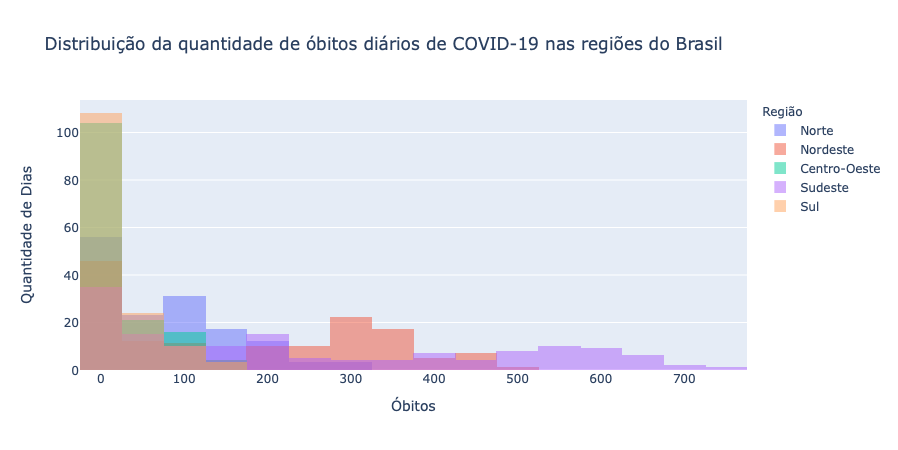

In [70]:
fazer_histograma_plotly()

## BoxPlot

No **plotly** os argumentos do *boxplot* são muito semelhantes aos do histograma, mudando essencialmente que o argumento dos dados no histograma é *x* e do *boxplot* é *y*.

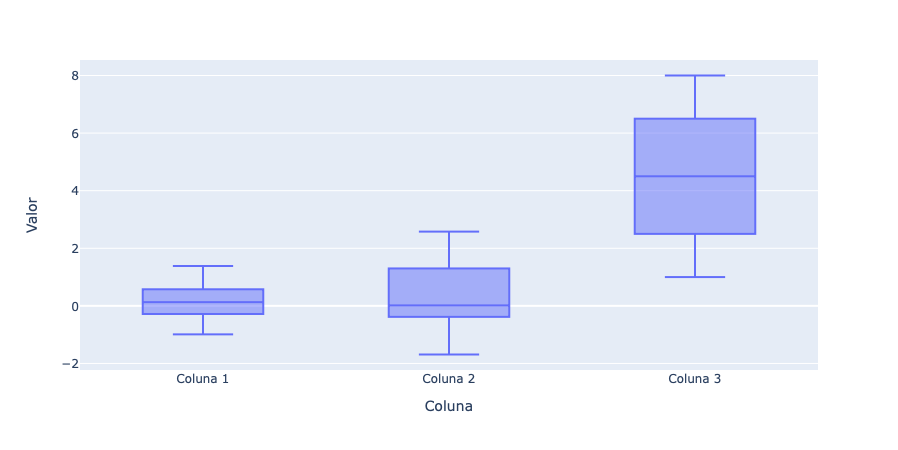

In [71]:
fig = px.box(df_exemplo_px, x="Coluna", y="Valor")
fig.show()

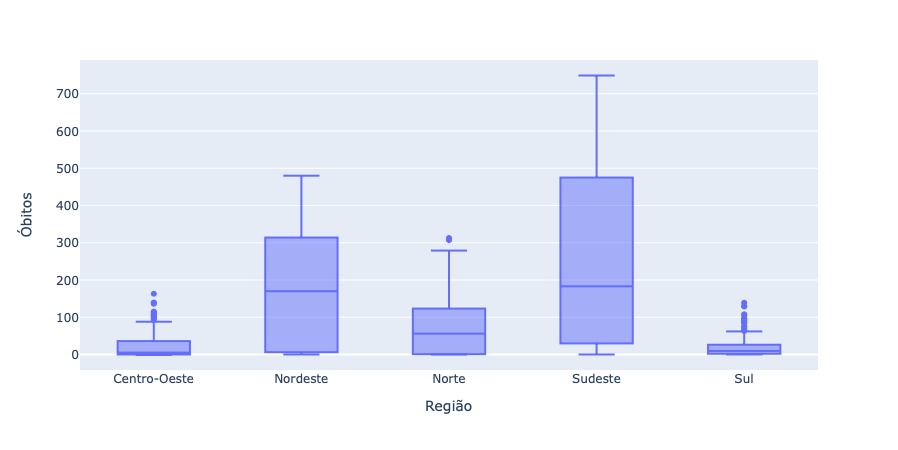

In [72]:
fig = px.box(covid_regioes_diarios_px, x="Região", y="Óbitos")
fig.show()

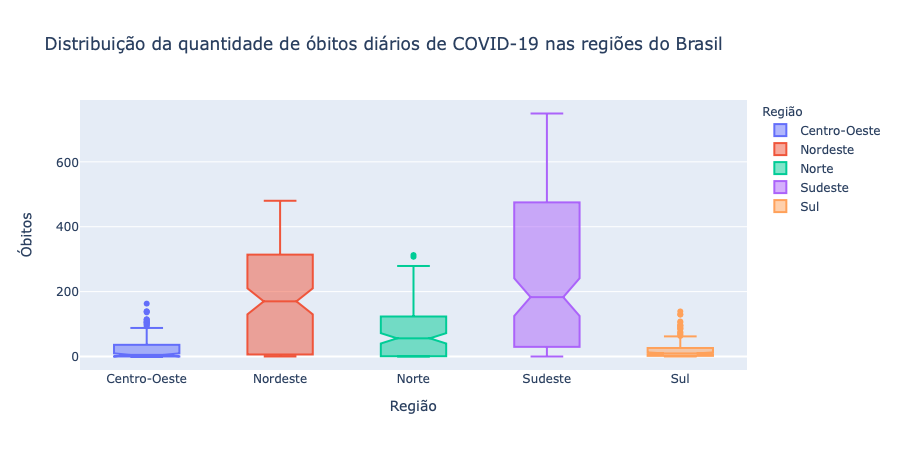

In [73]:
fig = px.box(covid_regioes_diarios_px, x='Região', y='Óbitos', notched=True, color='Região',
            title='Distribuição da quantidade de óbitos diários de COVID-19 nas regiões do Brasil')
fig.show()

In [74]:
def fazer_boxplot_plotly():
    fig = go.Figure()
    fig.update_layout(barmode='overlay', title='''
Distribuição da quantidade de óbitos diários de COVID-19 nas regiões do Brasil
                   ''',
                     yaxis_title="Óbitos", legend_title_text='Região')
    fig.add_trace(go.Box(y=covid_regioes_diarios['obitos_Norte'], name='Norte'))
    fig.add_trace(go.Box(y=covid_regioes_diarios['obitos_Nordeste'], name='Nordeste'))
    fig.add_trace(go.Box(y=covid_regioes_diarios['obitos_Centro-Oeste'],  name='Centro-Oeste'))
    fig.add_trace(go.Box(y=covid_regioes_diarios['obitos_Sudeste'], name='Sudeste'))
    fig.add_trace(go.Box(y=covid_regioes_diarios['obitos_Sul'],  name='Sul'))
    fig.show()

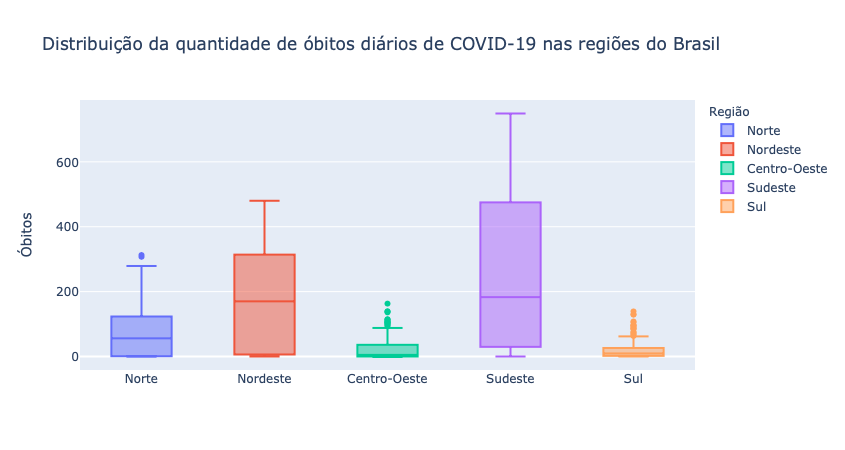

In [75]:
fazer_boxplot_plotly()